# Visualize samples for NGC 4047 in galactocentric radius and angle.

In [1]:
import os
import numpy as np
from astropy.table import Table, join, Column
from astropy import units as u
import matplotlib.pyplot as plt
import edge_pydb
from edge_pydb.edge_conv import gc_polr
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Read the observational values

In [2]:
# Image tables
cofile = edge_pydb.getfiles('NGC4047.comom_smo7.hdf5')
cotab  = Table.read(cofile, path='smo')

In [3]:
# Global tables
# globaldir = '../dat_glob/'

# For calculating radius we need CARMA reference position
coflux = Table.read(edge_pydb.getfiles('edge_coflux_smo7.csv'), format='ascii.ecsv')
radec  = Table([coflux['Name'], coflux['coRactr_smo7'], coflux['coDectr_smo7']])
join1  = join(cotab, radec, keys='Name')

# Optical radius, PA, Inc from LEDA
leda   = Table.read(edge_pydb.getfiles('edge_leda.csv'), format='ascii.ecsv')
r25tab = Table([leda['Name'], leda['ledaD25'], leda['ledaPA'], leda['ledaIncl']])
join2  = join(join1, r25tab, keys='Name')

# PA, Inc from LEDA
rftab  = Table.read(edge_pydb.getfiles('edge_rfpars.csv'), format='ascii.ecsv')
patab  = Table([rftab['Name'], rftab['rfPA'], rftab['rfInc']])
join3  = join(join2, patab, keys='Name')
print(join3.colnames)
join3.pprint()

['Name', 'ix', 'iy', 'ra_off', 'dec_off', 'rad_arc', 'azi_ang', 'emom0max', 'mom0', 'emom0', 'coRactr_smo7', 'coDectr_smo7', 'ledaD25', 'ledaPA', 'ledaIncl', 'rfPA', 'rfInc']
  Name   ix  iy   ra_off   dec_off  ...  ledaD25   ledaPA ledaIncl  rfPA rfInc
                   deg       deg    ...   arcmin    deg     deg               
------- --- --- --------- --------- ... ---------- ------ -------- ----- -----
NGC4047 110  14 -0.012606 -0.018334 ... 1.53461698  97.77    42.06 104.0  42.1
NGC4047 110  20 -0.012606 -0.016667 ... 1.53461698  97.77    42.06 104.0  42.1
NGC4047 107 155 -0.011354  0.020833 ... 1.53461698  97.77    42.06 104.0  42.1
NGC4047 110  23 -0.012606 -0.015834 ... 1.53461698  97.77    42.06 104.0  42.1
NGC4047 110  29 -0.012607 -0.014167 ... 1.53461698  97.77    42.06 104.0  42.1
NGC4047 110  32 -0.012607 -0.013334 ... 1.53461698  97.77    42.06 104.0  42.1
NGC4047 110  35 -0.012607 -0.012501 ... 1.53461698  97.77    42.06 104.0  42.1
NGC4047 107  17 -0.011345 -0.017501

## Calculate polar coordinates in galaxy plane.  Use the CARMA coordinates to turn the offsets into absolute positions, and also as the reference value for the galaxy center.  Use Becca's ringfit table for PA and INC.

In [4]:
rarc, azdeg = gc_polr(join3['coRactr_smo7']+join3['ra_off'], 
                  join3['coDectr_smo7']+join3['dec_off'], 
                  join3['coRactr_smo7'], join3['coDectr_smo7'],
                  np.array(join3['rfPA']), 
                  np.array(join3['rfInc']))

## Produce the dot plots

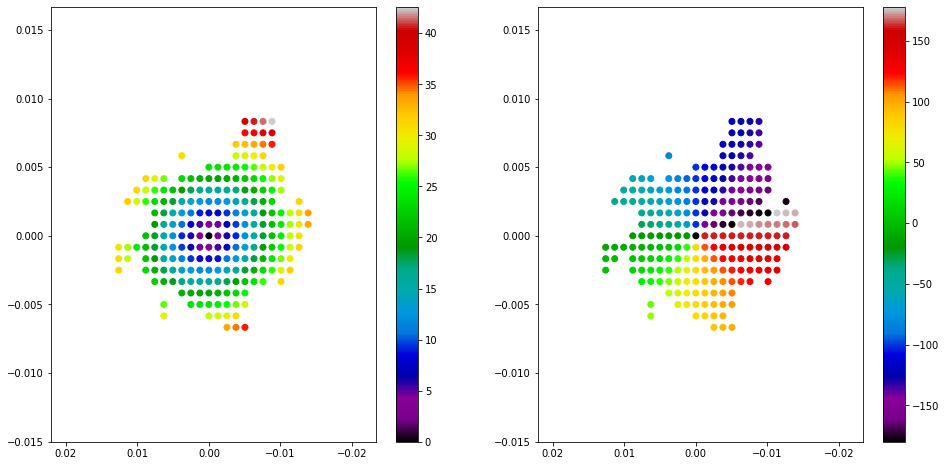

In [5]:
cmap = plt.cm.get_cmap('nipy_spectral')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sel = (join3['mom0']>0)
rplt = ax1.scatter(join3['ra_off'][sel],join3['dec_off'][sel],c=rarc[sel],cmap=cmap)
ax1.invert_xaxis()
plt.colorbar(rplt,ax=ax1)
tplt = ax2.scatter(join3['ra_off'][sel],join3['dec_off'][sel],c=azdeg[sel],cmap=cmap)
ax2.invert_xaxis()
plt.colorbar(tplt,ax=ax2)

## Compare with built-in calculation based on LEDA.

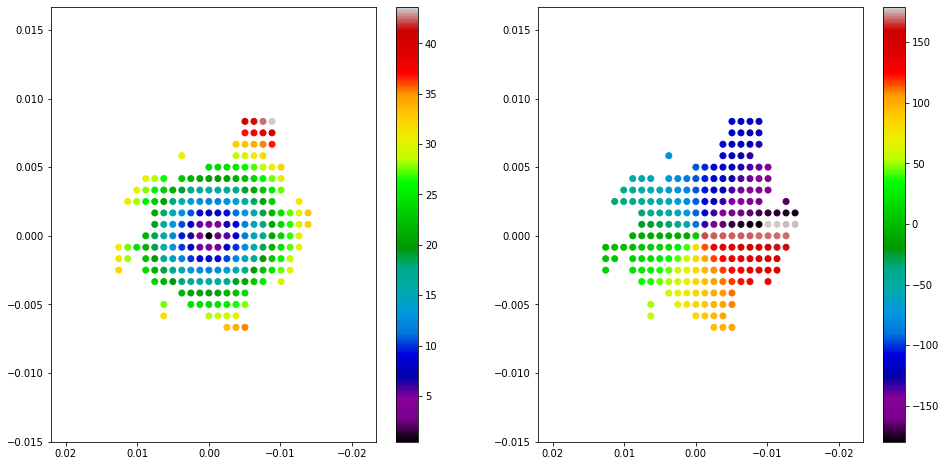

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sel = (join3['mom0']>0)
rplt = ax1.scatter(join3['ra_off'][sel],join3['dec_off'][sel],c=join3['rad_arc'][sel],cmap=cmap)
ax1.invert_xaxis()
plt.colorbar(rplt,ax=ax1)
tplt = ax2.scatter(join3['ra_off'][sel],join3['dec_off'][sel],c=join3['azi_ang'][sel],cmap=cmap)
ax2.invert_xaxis()
plt.colorbar(tplt,ax=ax2)